In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rosbag
import pymap3d as pm
import numba as nb

from scipy.signal import savgol_filter
%matplotlib inline

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
def wrap_angle(angle):
    return (angle + np.pi) % (2 * np.pi) - np.pi

@nb.njit()
def to_euler(x, y, z, w):
    """Dari Coursera: Return as xyz (roll pitch yaw) Euler angles."""
    roll = np.arctan2(2 * (w * x + y * z), 1 - 2 * (x**2 + y**2))
    pitch = np.arcsin(2 * (w * y - z * x))
    yaw = np.arctan2(2 * (w * z + x * y), 1 - 2 * (y**2 + z**2))
    return np.array([roll, pitch, yaw])
# Compile the to_euler
_ = to_euler(1.5352300785980803e-15, -1.3393747145983517e-15, -0.7692164172827881, 0.638988343698562)

In [3]:
ls

analisis_data3-Copy1.ipynb  BERHASIL_PARAMETER_1/  BERHASIL_PARAMETER_3/
analisis_data3.ipynb        BERHASIL_PARAMETER_2/


In [4]:
bag = rosbag.Bag('BERHASIL_PARAMETER_3/S_7_THROTTLE_KONSTAN_kv_throttle_2,5_2020-08-26-14-42-12.bag')
#print(bag)

In [5]:
cs_t = []
cs_action_throttle = []
cs_action_steer = []
cs_error_lateral = []
cs_error_yaw = []
cs_actual_x = []
cs_actual_y = []
cs_actual_yaw = []
cs_actual_speed = []
cs_ref_x = []
cs_ref_y = []
cs_ref_yaw = []
cs_ref_curvature = []
cs_wp_idx = []
for topic, msg, _ in bag.read_messages(topics=['/control_signal']):
    cs_t.append(msg.header.stamp.to_sec())
    cs_action_throttle.append(msg.action_throttle)
    cs_action_steer.append(msg.action_steer)
    cs_error_lateral.append(msg.error_lateral)
    cs_error_yaw.append(msg.error_yaw)
    cs_actual_x.append(msg.actual_x)
    cs_actual_y.append(msg.actual_y)
    cs_actual_yaw.append(msg.actual_yaw)
    cs_actual_speed.append(msg.actual_speed)
    cs_ref_x.append(msg.ref_x)
    cs_ref_y.append(msg.ref_y)
    cs_ref_yaw.append(msg.ref_yaw)
    cs_ref_curvature.append(msg.ref_curvature)
    cs_wp_idx.append(msg.wp_idx)
cs_t = np.array(cs_t)
cs_action_throttle = np.array(cs_action_throttle)
cs_action_steer = np.array(cs_action_steer)
cs_error_lateral = np.array(cs_error_lateral)
cs_error_yaw = np.array(cs_error_yaw)
cs_actual_x = np.array(cs_actual_x)
cs_actual_y = np.array(cs_actual_y)
cs_actual_yaw = np.array(cs_actual_yaw)
cs_actual_speed = np.array(cs_actual_speed)
cs_ref_x = np.array(cs_ref_x)
cs_ref_y = np.array(cs_ref_y)
cs_ref_yaw = np.array(cs_ref_yaw)
cs_ref_curvature = np.array(cs_ref_curvature)
cs_wp_idx = np.array(cs_wp_idx)

In [6]:
a_t = []
a_steering_setpoint = []
a_steering_angle = []
a_throttle_voltage = []
for topic, msg, _ in bag.read_messages(topics=['/logging_arduino']):
    a_t.append(msg.header.stamp.to_sec())
    a_steering_setpoint.append(msg.steering_setpoint )
    a_steering_angle.append(msg.steering_angle)
    a_throttle_voltage.append(msg.throttle_voltage)
a_t = np.array(a_t)
a_steering_setpoint = np.array(a_steering_setpoint)
a_steering_angle = np.array(a_steering_angle)
a_throttle_voltage = np.array(a_throttle_voltage)

# PLOT HASIL

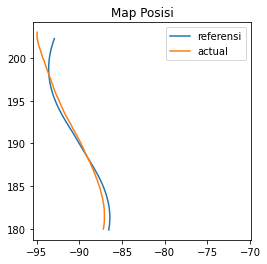

In [7]:
lim = [0, -1]
plt.plot(cs_ref_x[lim[0]:lim[1]], cs_ref_y[lim[0]:lim[1]], label='referensi')
plt.plot(cs_actual_x[lim[0]:lim[1]], cs_actual_y[lim[0]:lim[1]], label='actual')
plt.legend()
plt.axis('square')
plt.title('Map Posisi')
plt.show()

In [8]:
# plt.plot(cs_ref_yaw[lim[0]:lim[1]]*180/np.pi)
# plt.plot(cs_actual_yaw[lim[0]:lim[1]]*180/np.pi)

In [9]:
# fig, ax1 = plt.subplots()
# ax1.plot(cs_error_yaw[lim[0]:lim[1]]*180/np.pi)
# ax2 = ax1.twinx()
# ax2.plot(cs_error_lateral[lim[0]:lim[1]], color='tab:red')

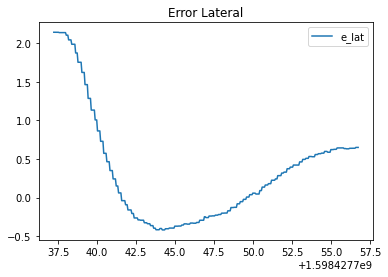

In [10]:
plt.plot(cs_t, cs_error_lateral, label='e_lat')
# plt.plot(cs_t, cs_error_yaw, label='e_yaw')
plt.legend()
# plt.title('Error Lateral dan Yaw')
plt.title('Error Lateral')
plt.show()

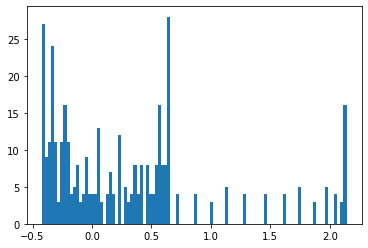

In [11]:
plt.hist(cs_error_lateral, bins=100)
plt.show()

In [12]:
# plt.plot(cs_ref_yaw)
# plt.plot(cs_actual_yaw)

In [13]:
cs_actual_x.shape

(391,)

In [14]:
# # CEK PERBEDAAN ERROR YAW

# dcsx = cs_actual_x[2:] - cs_actual_x[:-2]
# dcsy = cs_actual_y[2:] - cs_actual_y[:-2]
# dcsx = savgol_filter(dcsx, 501, 3)
# dcsy = savgol_filter(dcsy, 501, 3)
# temp = np.arctan2(dcsy, dcsx)
# temp_mean = np.mean(temp)
# cs_ref_yaw_mean = np.mean(cs_ref_yaw)
# plt.plot((temp - temp_mean + cs_ref_yaw_mean) - cs_ref_yaw[:-2], label='error yaw dy dx')
# plt.plot(cs_error_yaw, label='error yaw imu')
# plt.legend()

In [15]:
# # Ngecek apakah sesuai atau tidak
# # Ternyata yaw nya emang ada bias, kayaknya kita harus cek si yaw nya dulu Pras
# # Saat balik arah, apakah dia balik 180 derajatttt ?

# rdx = cs_ref_x[2:]-cs_ref_x[:-2]
# rdy = cs_ref_y[2:]-cs_ref_y[:-2]
# rdx = savgol_filter(rdx, 501, 3)
# rdy = savgol_filter(rdy, 501, 3)
# ref_yaw = np.arctan2(rdy, rdx)

# plt.plot(ref_yaw, label='ref yaw dari dy dx')
# plt.plot(-cs_ref_yaw, label='cs_ref_yaw')
# plt.plot(-cs_ref_yaw[:-2]-ref_yaw, label='bias')
# plt.legend()

# Sinyal Aktuator

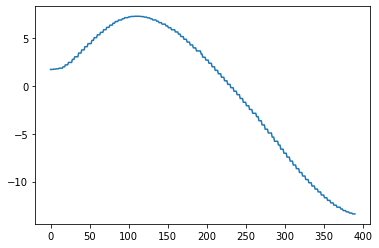

In [16]:
plt.plot(np.arcsin(2.*cs_ref_curvature)*180/np.pi)

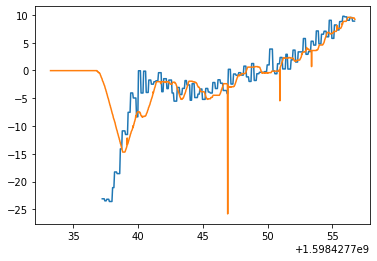

In [17]:
# Ga ketinggalan-ketinggalan banget Pras
plt.plot(cs_t, cs_action_steer)
plt.plot(a_t, a_steering_angle)

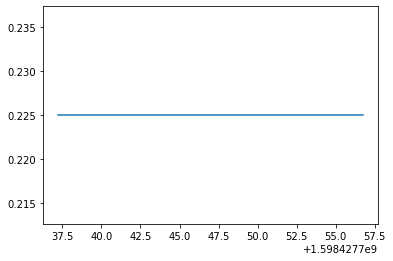

In [18]:
plt.plot(cs_t, cs_action_throttle)

In [19]:
f_t = []
f_v = []
for topic, msg, _ in bag.read_messages(topics=['/odometry/filtered_map']):
    f_t.append(msg.header.stamp.to_sec())
    v = msg.twist.twist.linear
    f_v.append(np.sqrt(v.x**2 + v.y**2))
f_t = np.array(f_t)
f_v = np.array(f_v)

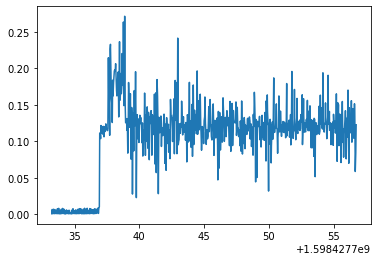

In [20]:
# SPEED
plt.plot(f_t, f_v)

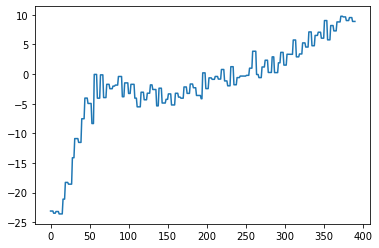

In [21]:
plt.plot(cs_action_steer)

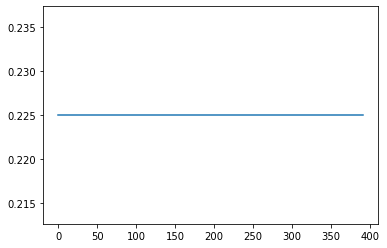

In [22]:
plt.plot(cs_action_throttle)